<a href="https://colab.research.google.com/github/arjun-anapalli/Spectacles/blob/main/DT_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll proceed on building a decision tree classifier for synthetic data generated here itself. The objective is to ensure feasibility of understanding of decision tree models and visualize the tree.

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic data
X, y = make_classification(
    n_samples=300,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=2.0,
    flip_y=0.0,
    random_state=42
)

feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,0.038866,-1.569893,-1.575057,0.154316,1.697699,1.496660,2
1,1.071125,-3.275850,-1.112331,-0.728157,-0.275355,2.352080,1
2,-0.369569,-2.838250,-3.402828,-1.123516,2.042959,4.002728,2
3,-0.907126,-2.304077,-1.822865,1.056655,-3.170255,1.682509,1
4,-0.432532,-2.309829,-1.569965,1.327078,-2.073693,-0.950281,0


Shape: (300, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  300 non-null    float64
 1   Feature_2  300 non-null    float64
 2   Feature_3  300 non-null    float64
 3   Feature_4  300 non-null    float64
 4   Feature_5  300 non-null    float64
 5   Feature_6  300 non-null    float64
 6   Target     300 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 16.5 KB
None

Class distribution:
Target
2    100
1    100
0    100
Name: count, dtype: int64

Summary stats:
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    -0.012828   -1.916522   -2.058856   -0.007675   -0.705106    0.699869   
std      0.923242    0.985257    1.439444    1.006005    2.117196    2.143843   
min     -2.714107   -4.548845  

<ipython-input-3-3472139952>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='viridis')


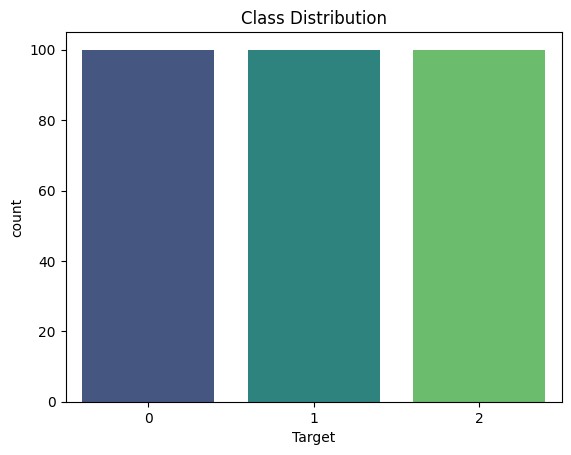

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nClass distribution:")
print(df['Target'].value_counts())

print("\nSummary stats:")
print(df.describe())

# Class balance plot
sns.countplot(data=df, x='Target', palette='viridis')
plt.title("Class Distribution")
plt.show()


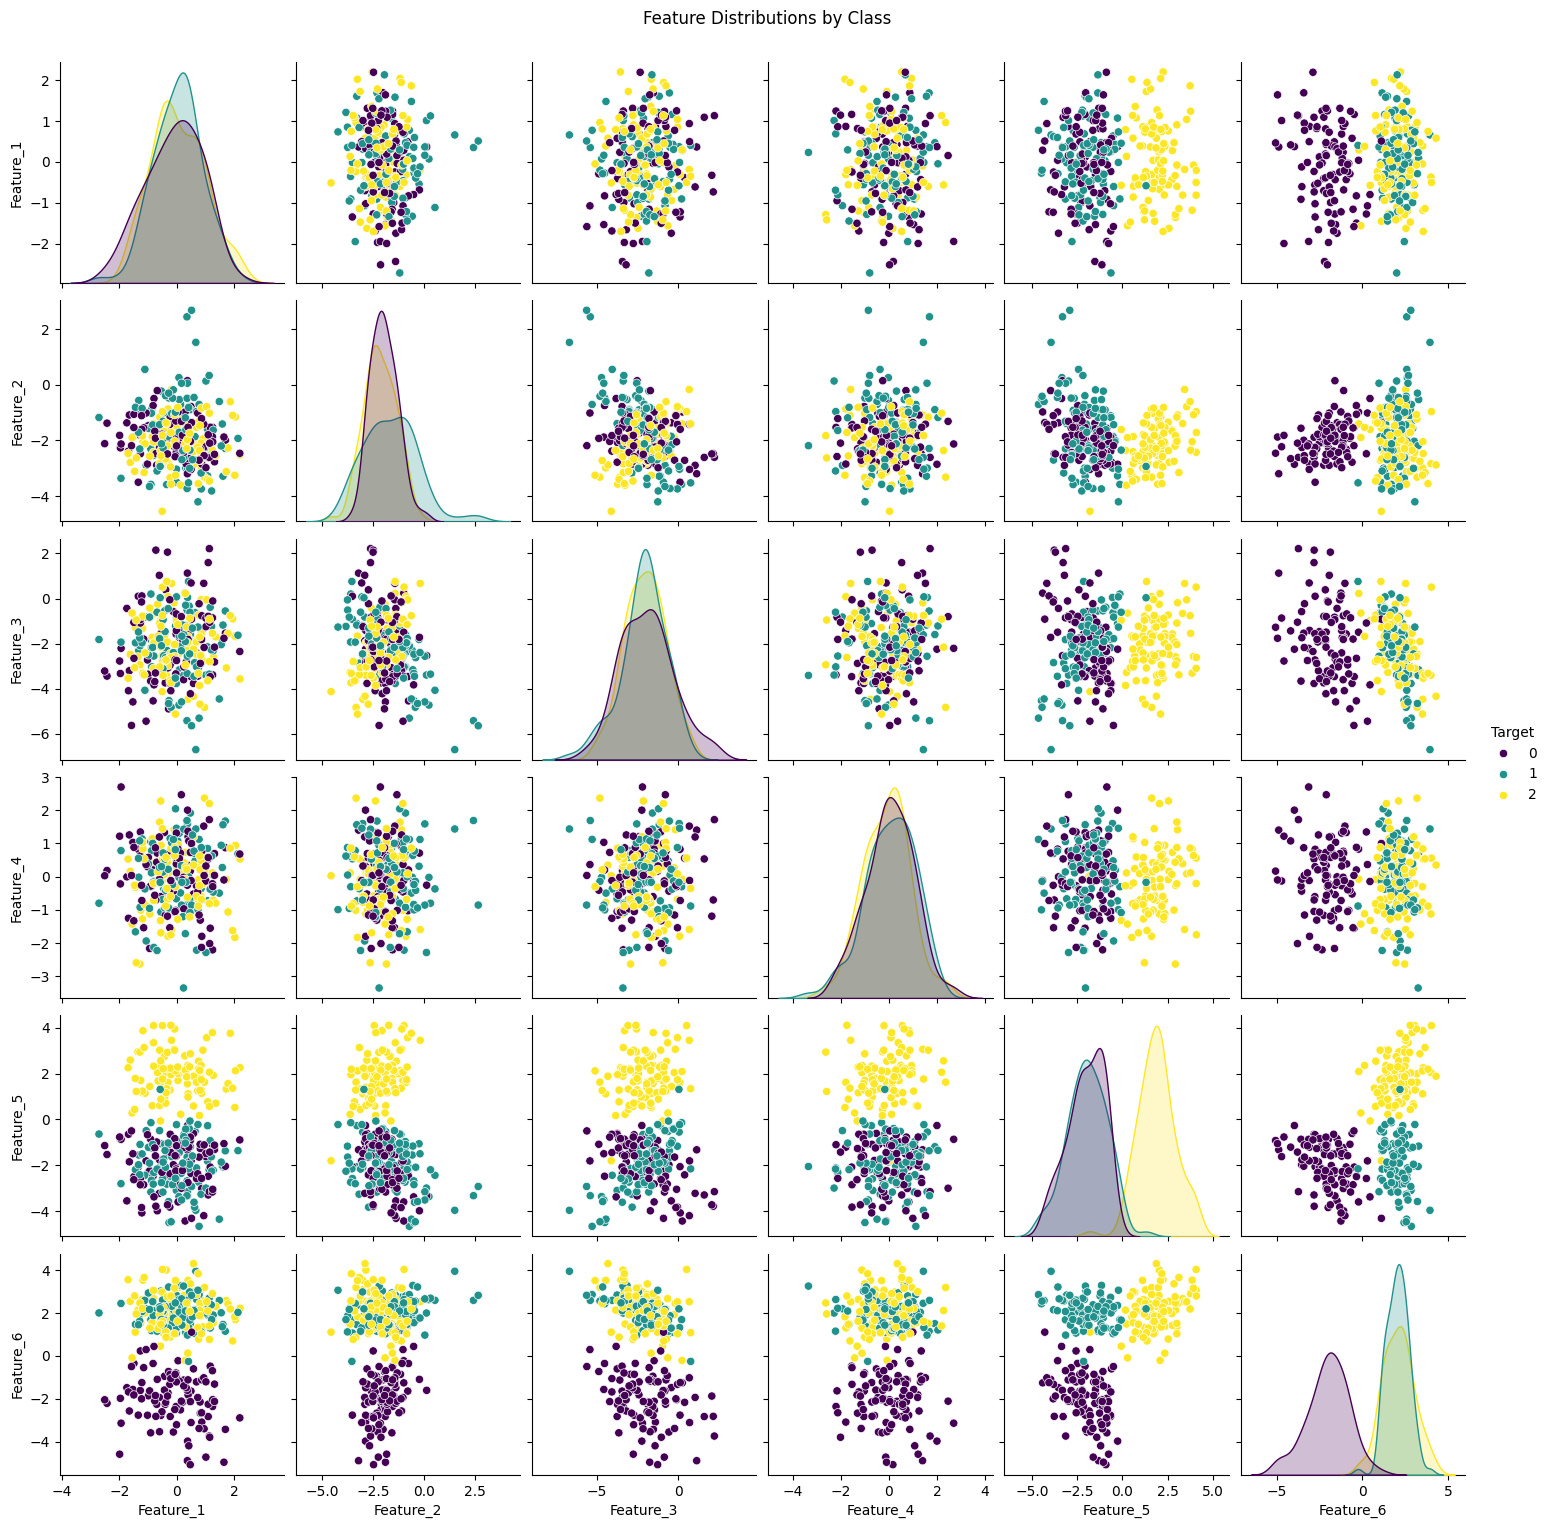

In [4]:
# Feature distributions
sns.pairplot(df, hue="Target", diag_kind="kde", palette="viridis")
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df['Target'], test_size=0.3, stratify=df['Target'], random_state=42
)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777

Confusion Matrix:
[[29  1  0]
 [ 0 30  0]
 [ 0  1 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      1.00      0.97        30
           2       1.00      0.97      0.98        30

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



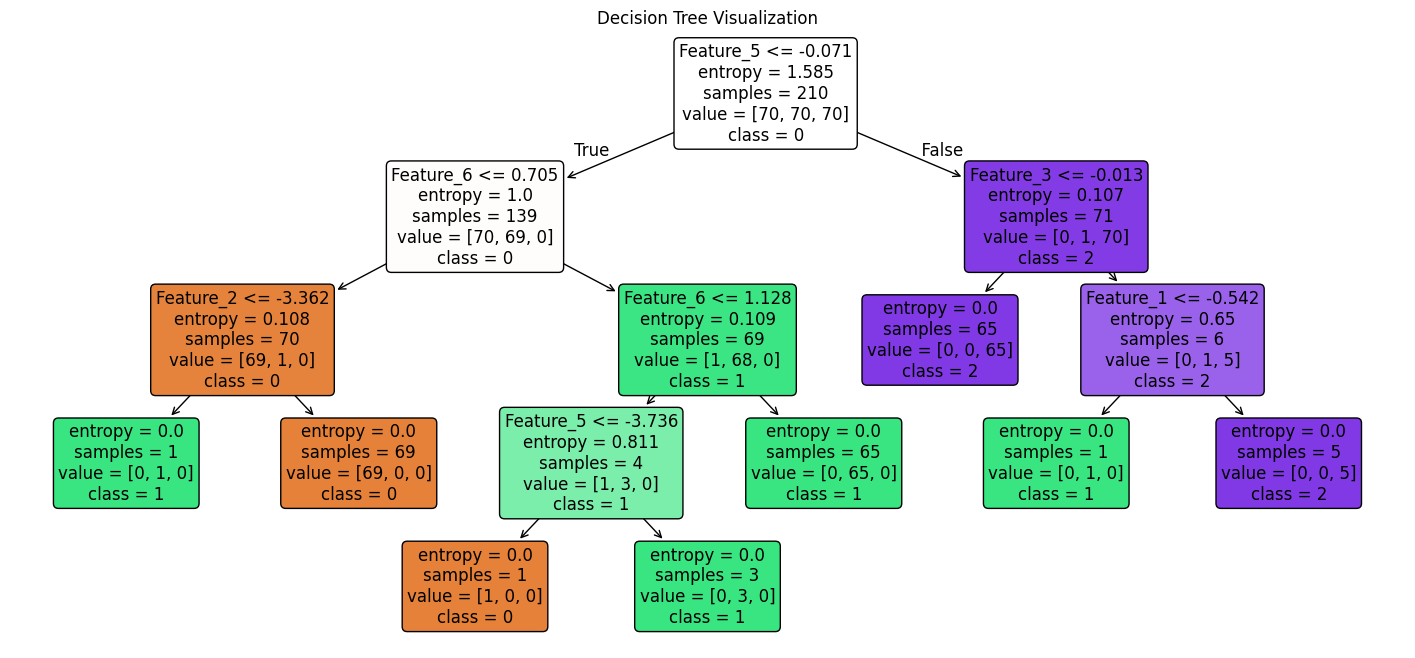

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=[str(cls) for cls in clf.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()

<ipython-input-8-2179962136>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')


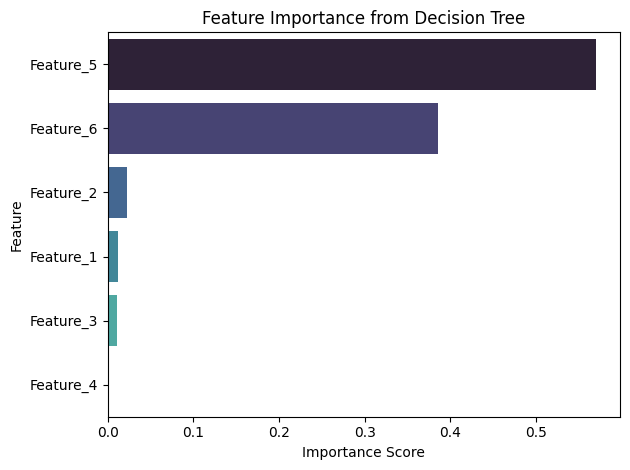

,Feature,Importance
4,Feature_5,0.569370
5,Feature_6,0.385132
1,Feature_2,0.022718
0,Feature_1,0.011718
2,Feature_3,0.011063
3,Feature_4,0.000000


In [8]:
import numpy as np

importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

importance_df

In [9]:
new_data = np.array([[1.0, -1.2, 0.5, 2.1, -0.8, 0.3]])
prediction = clf.predict(new_data)[0]

print(f"Prediction for {new_data.tolist()[0]} ➤ Class {prediction}")

Prediction for [1.0, -1.2, 0.5, 2.1, -0.8, 0.3] ➤ Class 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
